In [4]:
!pip install clickhouse-driver
from clickhouse_driver import Client
client = Client('oleg.orbita.work', port = 9000, user='student_ml',
password='CGRV8zemLGgsfdz7Uc6ZJeisGTcPQa', settings={'use_numpy': True})


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 10.6 MB/s eta 0:00:00


4. Загрузите данные из таблицы game_sales, которая находится в базе
students_datas. Рассчитайте необходимые показатели и визуализируйте информацию,
используя различные инструменты.


In [5]:
data = "SELECT * FROM students_datas.game_sales"
df = client.query_dataframe(data)
print(df.head(5))


              Name Platform    Year     Genre   Publisher  NA_Sales  EU_Sales  \
0          Pac-Man     2600  1982.0    Puzzle       Atari      7.28      0.45   
1         Pitfall!     2600  1981.0  Platform  Activision      4.21      0.24   
2        Asteroids     2600  1980.0   Shooter       Atari      4.00      0.26   
3  Missile Command     2600  1980.0   Shooter       Atari      2.56      0.17   
4   Space Invaders     2600     NaN   Shooter       Atari      2.36      0.14   

   JP_Sales  Other_Sales  Global_Sales  
0       0.0         0.08          7.81  
1       0.0         0.05          4.50  
2       0.0         0.05          4.31  
3       0.0         0.03          2.76  
4       0.0         0.03          2.53  


# **Визуализация**

In [5]:
import matplotlib.pyplot as plt


*   **Продажи видеоигр по годам**







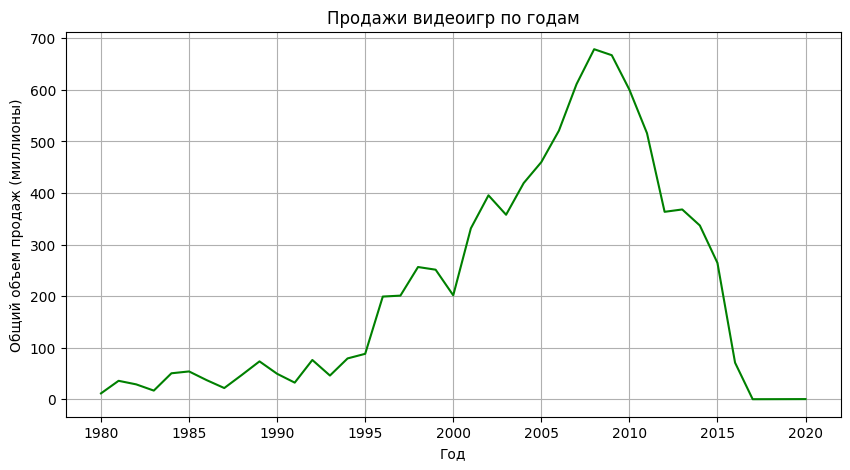

In [6]:
sales = df.groupby('Year')['Global_Sales'].sum()

# с помощью matplotlib
plt.figure(figsize=(10, 5))
plt.plot(sales.index, sales.values, color='green')
plt.title('Продажи видеоигр по годам')
plt.xlabel('Год')
plt.ylabel('Общий объем продаж (миллионы)')
plt.grid(True)
plt.show()

График демонстрирует, что с начала 2000-х годов наблюдался стремительный рост продаж видеоигр, достигший своего максимума в 2008 году с объемом продаж около 680 миллионов. После этого пика продажи начали постепенно снижаться, что может быть связано с экономическим кризисом


*   **Популярность игровых платформ по общему объему продаж**




<ipython-input-7-045ede9496e4>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_platform  = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)


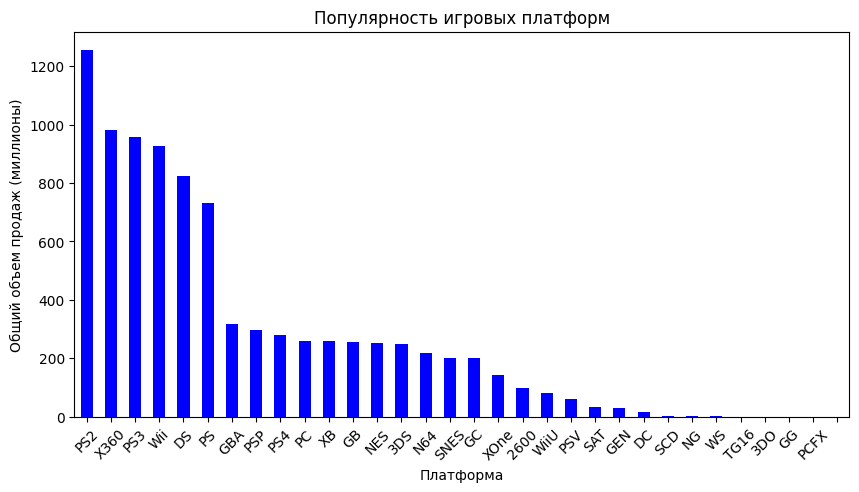

In [7]:
sales_by_platform  = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)

# с помощью pandas
sales_by_platform.plot(
    kind='bar',
    figsize=(10, 5),
    color='blue',
    title='Популярность игровых платформ',
    xlabel='Платформа',
    ylabel='Общий объем продаж (миллионы)',
    rot=45,
)

plt.show()


На диаграмме видно, что самой популярной игровой платформой по объёму продаж является PS2, примерно схожие объемы продаж показывают Xbox360, PS3 и Nintendo Wii

* **Топ-10 издаетелей по количеству выпущенных игр**

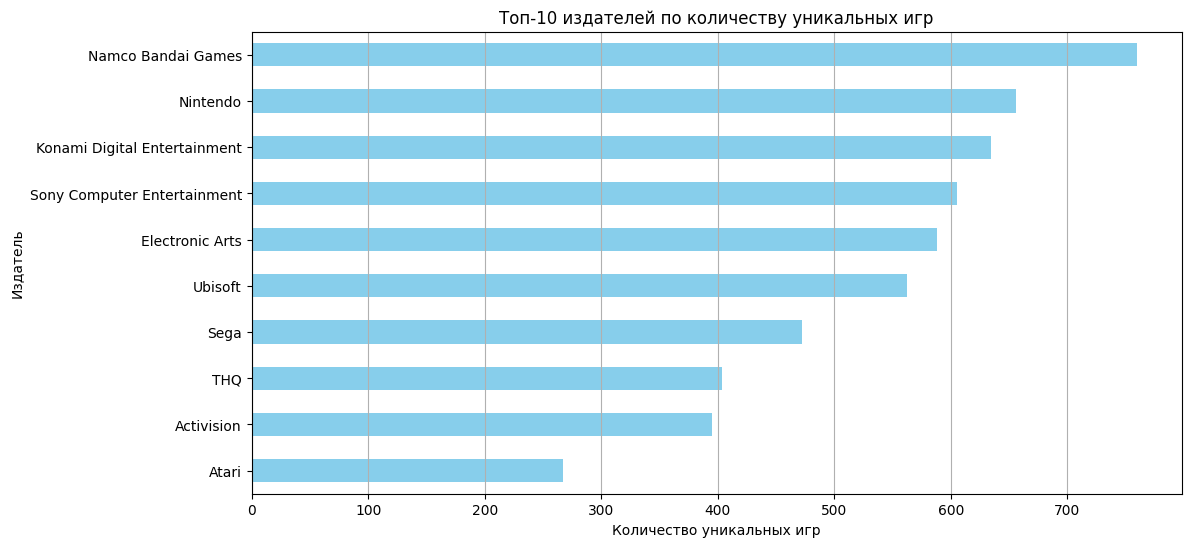

In [8]:
games = df.drop_duplicates(subset=['Name']) #оставляем только названия игр без повторов

games_top = games['Publisher'].value_counts().nlargest(10).sort_values()

games_top.plot(
    kind='barh',
    figsize=(12, 6),
    color='skyblue',
    title='Топ-10 издателей по количеству уникальных игр',
    ylabel = 'Издатель',
    xlabel = 'Количество уникальных игр'
)
plt.grid(axis='x')
plt.show()



Диаграмма демонстрирует, что наибольщее количество игр было выпущено под издательством Namco Bandai Games(700+), также в топ-5 вошли: Nintendo, Konami, Sony и EA

* **Популярность жанров по продажам в Северной Америке**

<ipython-input-11-3f439af3db34>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  na_sales_genre = df.groupby('Genre')['NA_Sales'].sum()


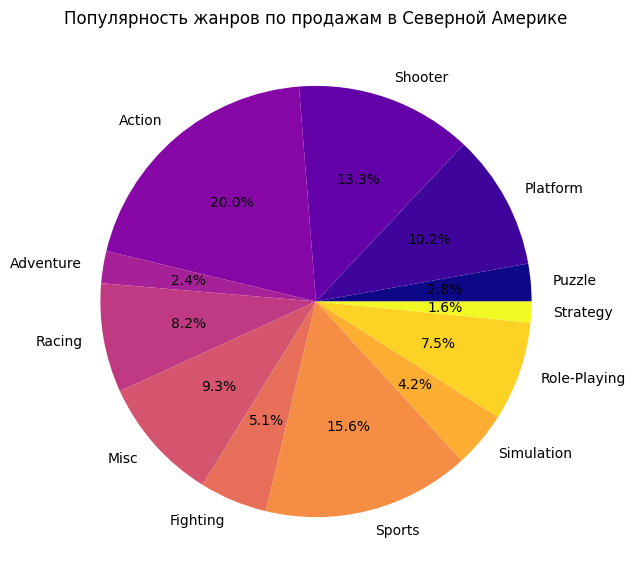

In [11]:
na_sales_genre = df.groupby('Genre')['NA_Sales'].sum()
na_sales_genre = na_sales_genre[na_sales_genre > 0] #убираем нулевые жанры

na_sales_genre.plot(
    kind='pie',
    figsize=(7, 7),
    title='Популярность жанров по продажам в Северной Америке',
    autopct='%1.1f%%',
    colormap='plasma'
)

plt.ylabel('')
plt.show()

На диаграмме видно, что самым популярным жанром видеоигр в Северной Америке по объёму продаж является "Action" 20% от рынка, затем идет "Sports" с 15.6% и "Shooter" с 13.3%. Наименее популярными жанрами являются "Strategy" с 1.6% и "Adventure" с 2.4%

* **Зависимость продаж видеоигр в Европе от продаж в остальном мире**

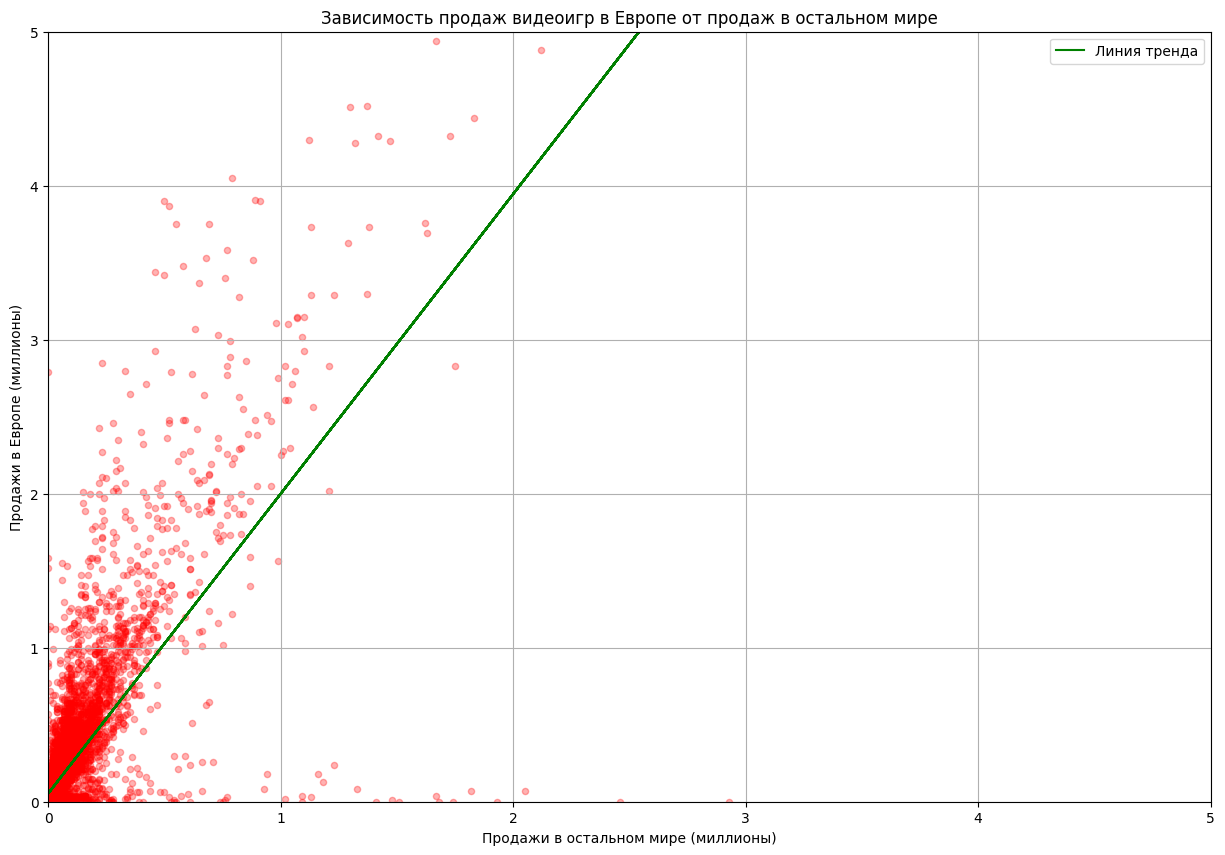

In [12]:
df.plot(
    kind='scatter', #каждая точка - отдельная игра
    x ='Other_Sales',
    y ='EU_Sales',
    color='red',
    alpha=0.3,
    figsize=(15, 10),
    title = 'Зависимость продаж видеоигр в Европе от продаж в остальном мире',
    xlabel='Продажи в остальном мире (миллионы)',
    ylabel='Продажи в Европе (миллионы)',
    grid = True,
)
plt.xlim(0, 5)
plt.ylim(0, 5)

#можно построить линию тренда
from sklearn.linear_model import LinearRegression
X = df[['Other_Sales']]
y = df['EU_Sales']
model = LinearRegression()
model.fit(X, y)
trend_line = model.predict(X)
plt.plot(df['Other_Sales'], trend_line, color='green', label='Линия тренда')
plt.legend()
plt.show()

In [13]:
from sklearn.metrics import r2_score
r2 = r2_score(y, trend_line)
print(r2)

0.5276350378990173


*R^2 = 0.5276* (чем ближе к 1, тем лучше модель объясняет данные), что указывает на умеренную зависимость между продажами в Европе и продажами в остальном мире.
Модель объясняет около 52.76% вариации данных, но для более точных прогнозов нужно учитывать другие факторы.

* **Продажи игр в Японии по годам и жанрам**

<ipython-input-81-0c95084f2310>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_year_genre = df.groupby(['Year', 'Genre'])['JP_Sales'].sum().unstack() #unstack() - каждый жанр


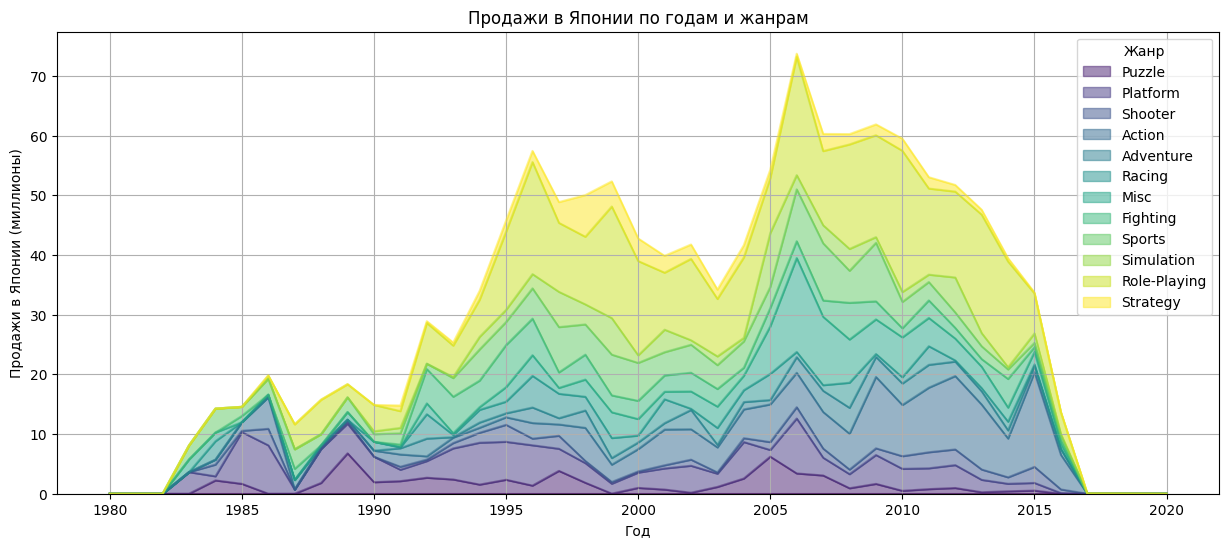

In [ ]:
sales_by_year_genre = df.groupby(['Year', 'Genre'])['JP_Sales'].sum().unstack() #unstack() - каждый жанр становиться столбцом

sales_by_year_genre.plot(
    kind='area',
    figsize=(15, 6),
    alpha=0.5,
    title='Продажи в Японии по годам и жанрам',
    xlabel='Год',
    ylabel='Продажи в Японии (миллионы)',
    colormap='viridis'
)

plt.grid(True)
plt.legend(title='Жанр')
plt.show()

График демонстрирует, что наибольшие продажи видеоигр в Японии пришлись на 2006 год, когда наиболее популярны были такие жанры, как "Role-Playing" и "Racing".

*  **Топ-10 игр по глобальным продажам**




In [ ]:
import plotly.express as px

data = df.groupby('Name')['Global_Sales'].sum().reset_index()

top = data.sort_values(by='Global_Sales', ascending=False).head(10)
#print(top)

# Интерактивный график с помощью plotly.express
plt = px.bar(
    top,
    x='Name',
    y='Global_Sales',
    title='Топ-10 игр по глобальным продажам',
    labels={'Global_Sales': 'Глобальные продажи (миллионы)', 'Name': 'Название игры'},
)

plt.update_layout(yaxis_title='Глобальные продажи (миллионы)')

plt.show()


<ipython-input-104-57b26603ca64>:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



На диаграмме видно, что самой продаваемой игрой является Wii Sports (82.74 млн), далее идет GTA V (55.92 млн), третье место занимает Super Mario Bros. (45.31 млн)

2. Проанализируйте полученные графики и сделайте выводы.

  Игры каких жанров были наиболее популярны до 2000 года, а какие после?
Оцените популярность жанров по количеству выпущенных игр и по объему
продаж по всему миру. Для визуализации полученных результатов
используйте столбиковые диаграммы. Замечание. Одна и та же игра может
встречаться в выборке несколько раз, т.к. она может быть выпущена на
нескольких платформах.

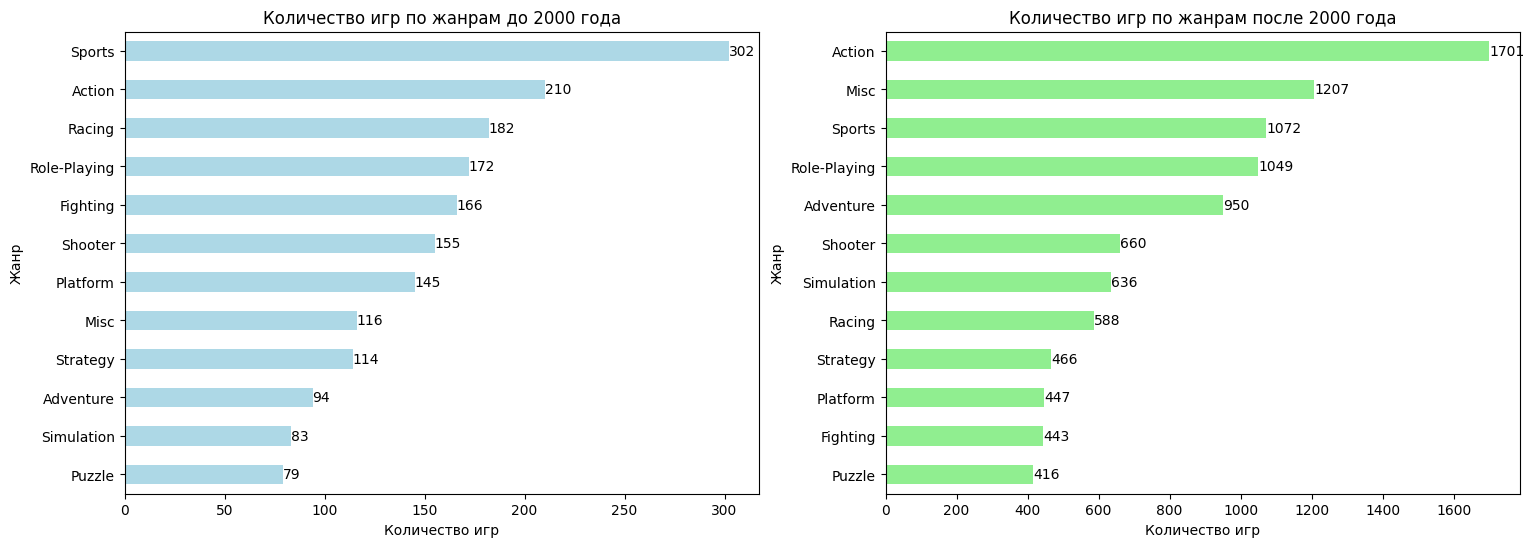

In [42]:
df_before_2000 = df[df['Year'] < 2000]
df_after_2000 = df[df['Year'] >= 2000]

# Убираем дубликаты по названию игры
games_b_2000 = df_before_2000.drop_duplicates(subset=['Name'])
games_a_2000 = df_after_2000.drop_duplicates(subset=['Name'])

qua_genre_b_2000 = games_b_2000['Genre'].value_counts() # кол-во игр каждого жанра до 2000 года
qua_genre_a_2000 = games_a_2000['Genre'].value_counts() # кол-во игр каждого жанра после 2000 года

#убираем жанры с нулем игр
qua_genre_b_2000 = qua_genre_b_2000[qua_genre_b_2000 > 0]
qua_genre_a_2000 = qua_genre_a_2000[qua_genre_a_2000 > 0]

fig, axes = plt.subplots(1, 2, figsize=(18, 6)) #сетка на 2 графика

qua_genre_b_2000.sort_values().plot(kind='barh', ax=axes[0], color='lightblue')
axes[0].set_title(f'Количество игр по жанрам до 2000 года')
axes[0].set_xlabel('Количество игр')
axes[0].set_ylabel('Жанр')
for i, value in enumerate(qua_genre_b_2000.sort_values()):
    axes[0].text(value, i, f'{value}', va='center')

qua_genre_a_2000.sort_values().plot(kind='barh', ax=axes[1], color='lightgreen')
axes[1].set_title(f'Количество игр по жанрам после 2000 года')
axes[1].set_xlabel('Количество игр')
axes[1].set_ylabel('Жанр')
for i, value in enumerate(qua_genre_a_2000.sort_values()):
    axes[1].text(value, i, f'{value}', va='center')

plt.show()




* На диаграмме видно, что наиболее популярными до 2000 года были игры жанров: "Sports" (302 игры), "Action" (210 игр), "Racing" (182 игры)
* После 2000 года топ-3 популярных жанров составили: "Action" (1701 игра), "Misc" (1207 игр), "Sports" (1072 игры)

<ipython-input-64-68d3f191b420>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_genre_b_2000 = games_b_2000.groupby('Genre')['Global_Sales'].sum()
<ipython-input-64-68d3f191b420>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_genre_a_2000 = games_a_2000.groupby('Genre')['Global_Sales'].sum()


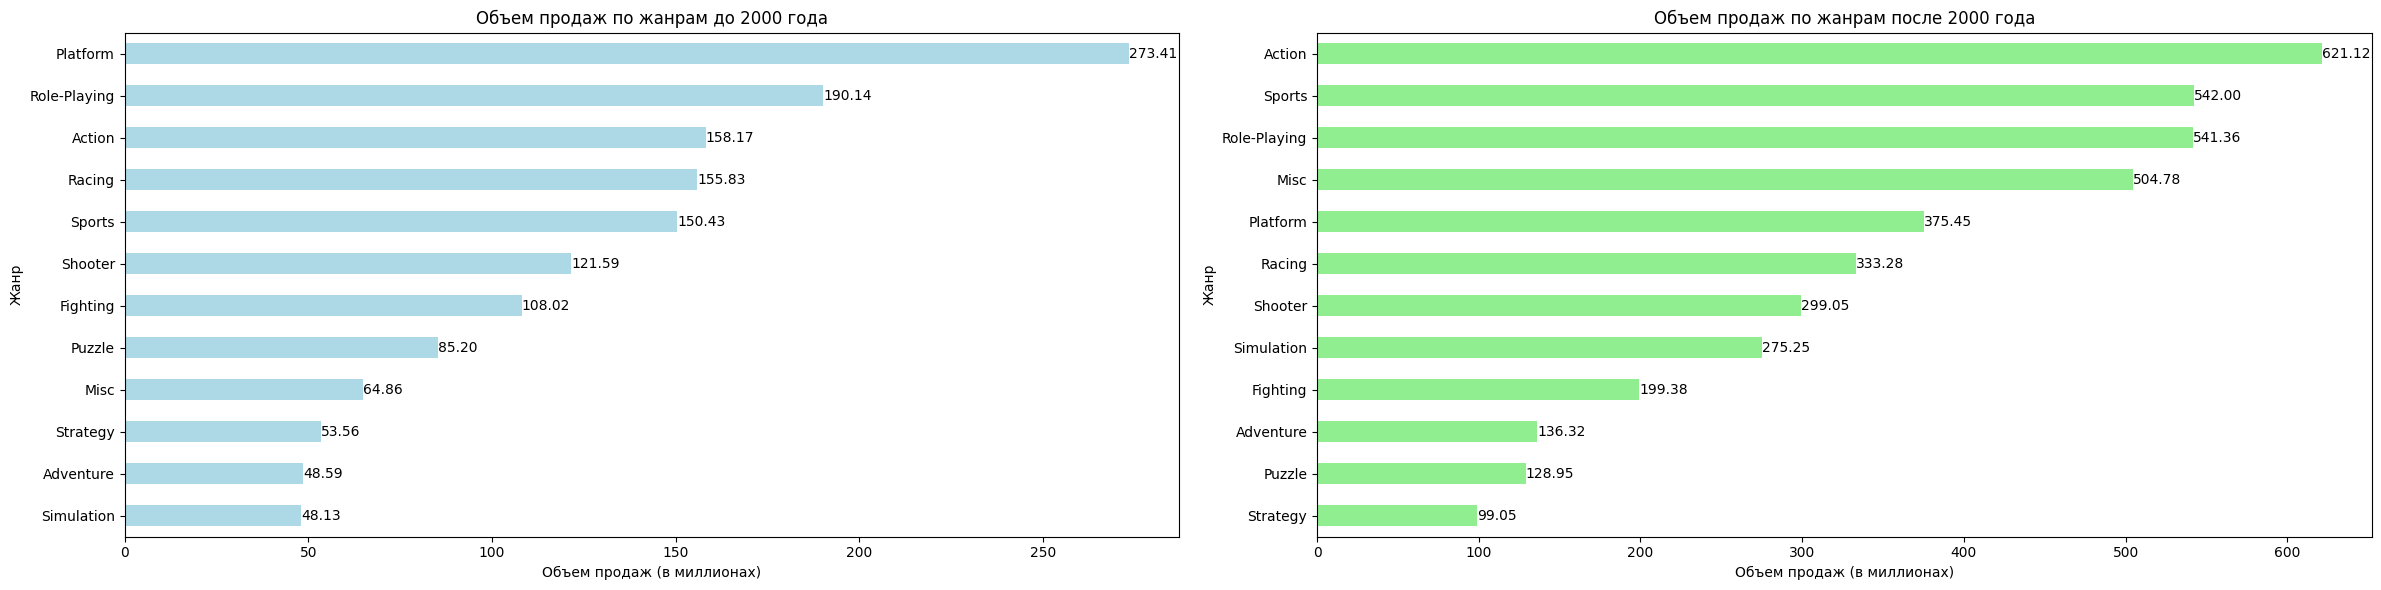

In [64]:
df_before_2000 = df[df['Year'] < 2000]
df_after_2000 = df[df['Year'] >= 2000]

sales_genre_b_2000 = games_b_2000.groupby('Genre')['Global_Sales'].sum()
sales_genre_a_2000 = games_a_2000.groupby('Genre')['Global_Sales'].sum()

sales_genre_b_2000 = sales_genre_b_2000[sales_genre_b_2000 > 0]
sales_genre_a_2000 = sales_genre_a_2000[sales_genre_a_2000 > 0]

fig, axes = plt.subplots(1, 2, figsize=(24, 6))  # Сетка на 2 графика

sales_genre_b_2000.sort_values().plot(kind='barh', ax=axes[0], color='lightblue')
axes[0].set_title('Объем продаж по жанрам до 2000 года')
axes[0].set_xlabel('Объем продаж (в миллионах)')
axes[0].set_ylabel('Жанр')
for i, value in enumerate(sales_genre_b_2000.sort_values()):
    axes[0].text(value, i, f'{value:.2f}', va='center')

# График для объема продаж после 2000 года
sales_genre_a_2000.sort_values().plot(kind='barh', ax=axes[1], color='lightgreen')
axes[1].set_title('Объем продаж по жанрам после 2000 года')
axes[1].set_xlabel('Объем продаж (в миллионах)')
axes[1].set_ylabel('Жанр')
for i, value in enumerate(sales_genre_a_2000.sort_values()):
    axes[1].text(value, i, f'{value:.2f}', va='center')

plt.tight_layout() #выравнивание отступов
plt.show()

* На диаграмме видно, что наиболее популярными до 2000 года по объему продаж были игры жанров: "Platform" (273.41 млн), "Role-Playing" (190.14 млн), "Action" (158.17 млн)
* После 2000 года топ-3 популярных жанров по объему продаж составили: "Action" (621.12 млн), "Sports" (542 млн), "Sports" "Role-Playing" (541.36 млн)

3. Отобразите на графике общее число видеоигр, выпущенных в каждом году

*Как корректно учитывать релизы видеоигр, если одна и та же игра могла быть выпущена на разных платформах в разные годы? Следует ли считать отдельным релизом каждое издание игры для каждой платформы, или же необходимо учитывать только год первого выпуска игры?*

Будет рассматриваться вариант, при котором уникальным считается релиз игры, выпущенной в конкретный год.

In [89]:
pre_df = df.dropna(subset=['Year'])
pre_df = pre_df.drop_duplicates(subset=['Name', 'Year'])
duplicate_games = pre_df.groupby('Name').filter(lambda x: x['Year'].nunique() > 1) #находим игры, выпущенные в разные года
duplicate_games['Year'] = duplicate_games['Year'].astype(int)

if not duplicate_games.empty:
    print(duplicate_games[['Name', 'Platform', 'Year']].sort_values(by='Name'))
else:
    print("Не найдено")

<ipython-input-89-191fc68c61f7>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  duplicate_games = pre_df.groupby('Name').filter(lambda x: x['Year'].nunique() > 1) #находим игры, выпущенные в разные года


                                                    Name Platform  Year
0                                                Pac-Man     2600  1982
4738                                             Pac-Man      NES  1984
2                                              Asteroids     2600  1980
5922                                           Asteroids       PS  1998
3                                        Missile Command     2600  1980
...                                                  ...      ...   ...
13765                                  Big League Sports      Wii  2008
15565                                              Fable       XB  2004
14756                                              Fable     X360  2014
15703  2 in 1 Combo Pack: Sonic Heroes / Super Monkey...       XB  2004
15233  2 in 1 Combo Pack: Sonic Heroes / Super Monkey...     X360  2013

[1465 rows x 3 columns]


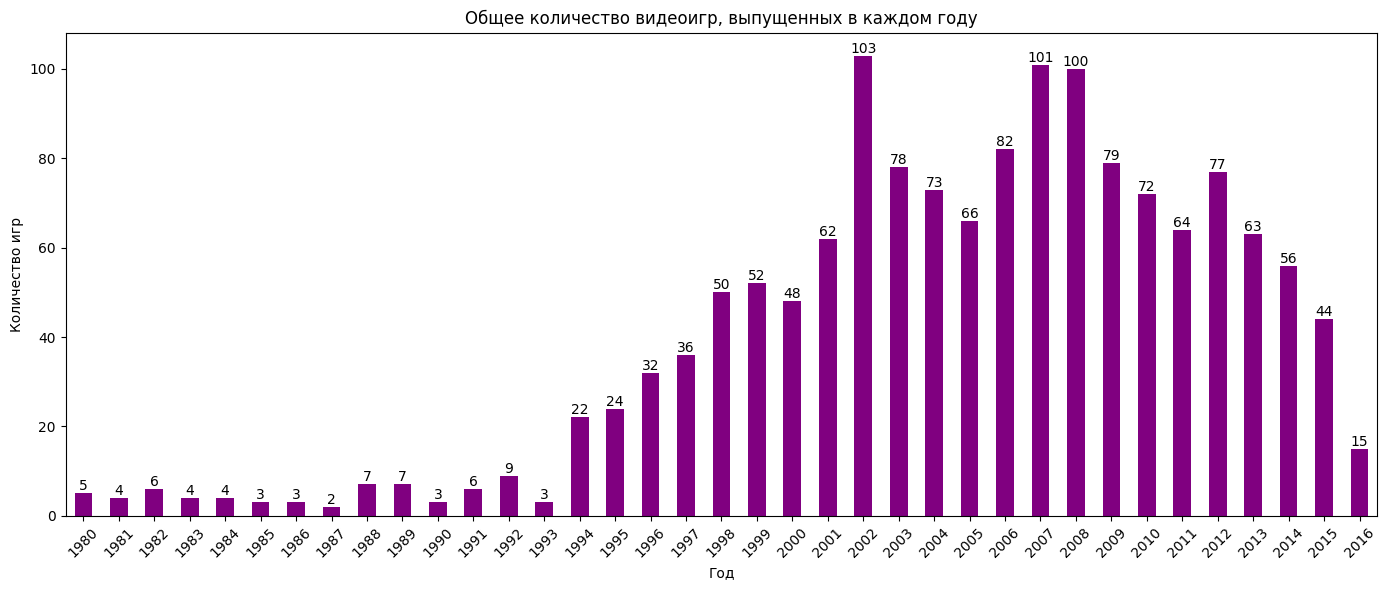

In [96]:
games_per_year = duplicate_games['Year'].value_counts().sort_index()

games_per_year.plot(
    kind='bar',
    color='purple',
    figsize=(14, 6),
    title='Общее количество видеоигр, выпущенных в каждом году',
    xlabel='Год',
    ylabel='Количество игр',
    rot = 45
    )

for i, value in enumerate(games_per_year):
    plt.text(i, value , f'{value}', ha='center', va='bottom')

plt.tight_layout()
plt.show()



На диаграмме видно, что наибольшее количество видеоигр было выпущено в 2002 году (103 игры)

4. Определите трех издателей, выпустивших наибольшее количество видеоигр.
Изобразите количество выпущенных издателями видеоигр для каждой платформы
на столбиковой диаграмме (можно использовать диаграмму с накоплением).

<ipython-input-122-26192daf6abc>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pub_top = df_pub.groupby(['Publisher', 'Platform']).size().unstack(fill_value=0)


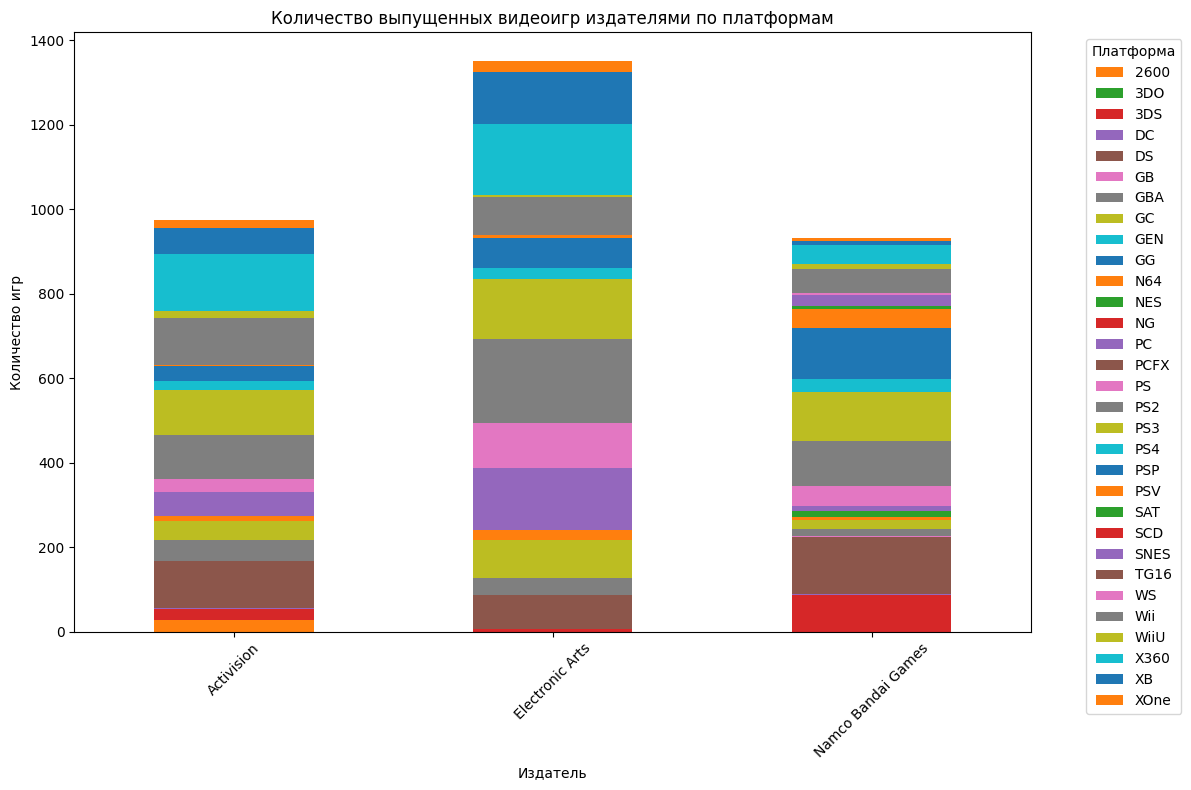

In [122]:
games_top = df['Publisher'].value_counts().nlargest(3).index

df_pub = df[df['Publisher'].isin(games_top)]
pub_top = df_pub.groupby(['Publisher', 'Platform']).size().unstack(fill_value=0)

pub_top.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 8),
    title = 'Количество выпущенных видеоигр издателями по платформам',
    xlabel = 'Издатель',
    ylabel = 'Количество игр',
    rot = 45
    )

plt.legend(title="Платформа", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Диаграмма демонстрирует, что наибольщее количество игр было выпущено под издательством EA (самая популярная платформа: PS2)

4. Отобразите на круговых диаграммах доли суммарного объема продаж с 1980г.
до 2000г. и с 2000г. до 2020г. в Северной Америке, Европе, Японии от объема
продаж по всему миру.

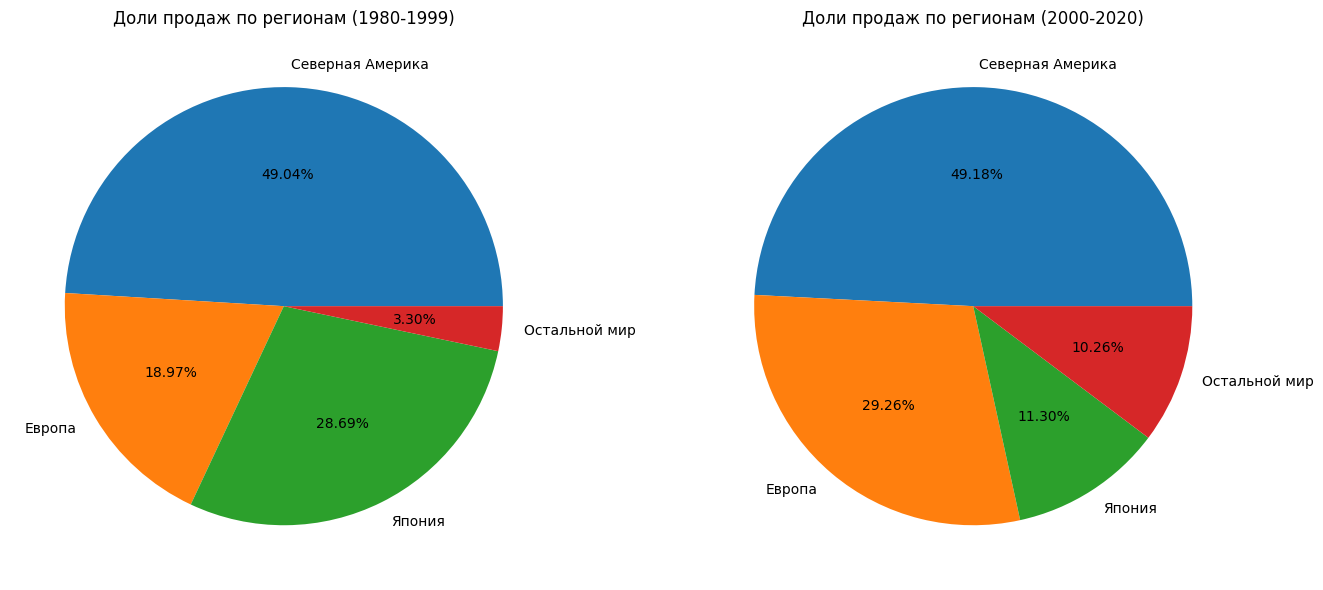

In [8]:
df_before_2000 = df[df['Year'] < 2000]
df_after_2000 = df[df['Year'] >= 2000]

sales_b_2000 = df_before_2000[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum() # Other_Sales решил тоже добавить
global_sales_b_2000 = df_before_2000['Global_Sales'].sum()

sales_a_2000 = df_after_2000[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum() # Other_Sales решил тоже добавить
global_sales_a_2000 = df_after_2000['Global_Sales'].sum()

sales_b_2000_percent = sales_b_2000 / global_sales_b_2000 * 100 # в процентах
sales_a_2000_percent = sales_a_2000 / global_sales_a_2000 * 100 # в процентах

text = ['Северная Америка', 'Европа', 'Япония', 'Остальной мир']

fig, axes = plt.subplots(1, 2, figsize=(14, 6)) #сетка на 2 графика

axes[0].pie(sales_b_2000_percent, labels=text, autopct='%1.2f%%')
axes[0].set_title('Доли продаж по регионам (1980-1999)')

axes[1].pie(sales_a_2000_percent, labels=text, autopct='%1.2f%%')
axes[1].set_title('Доли продаж по регионам (2000-2020)')

plt.tight_layout()
plt.show()

На круговой диаграмме видно, что наибольший объем продаж от общего числа прихолся на Северную Америку. Значительно сократились продажи в Японии в период с 2000 по 2020 года относительно 1980-1999 годов. Возрасли продажи в Европе и в остально мире